In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

data = pd.read_csv(r"C:\Users\tamal\Downloads\CarPrice_Assignment.csv")

In [13]:
# Extract the car company name
data['CarCompany'] = data['CarName'].apply(lambda x: x.split(' ')[0])

# Drop the original CarName column
data = data.drop('CarName', axis=1)

# Check for missing values
print(data.isnull().sum())

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64


In [14]:
# Ensure all categorical variables are properly converted to category type
categorical_columns = ['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [17]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and test sets
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the training set
X_train_const = sm.add_constant(X_train, has_constant='add')

# Build the model
model = sm.OLS(y_train.astype(float), X_train_const.astype(float)).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     58.53
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           4.55e-47
Time:                        10:36:07   Log-Likelihood:                -1206.3
No. Observations:                 143   AIC:                             2543.
Df Residuals:                      78   BIC:                             2735.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.76

Training R-squared: 0.9796010332907487


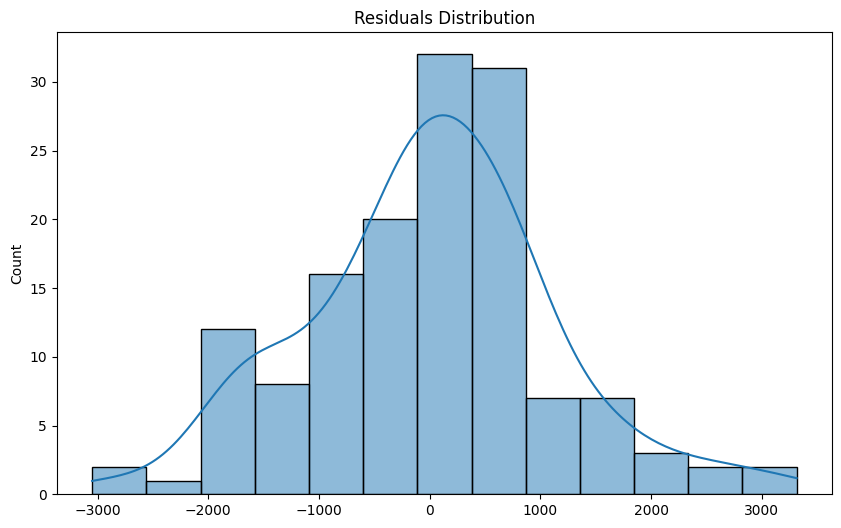

Test R-squared: 0.8816798485298681


In [18]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train_const)
train_r2 = r2_score(y_train, y_train_pred)
print('Training R-squared:', train_r2)

# Perform residual analysis
residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Make predictions on the test set
X_test_const = sm.add_constant(X_test, has_constant='add')
y_test_pred = model.predict(X_test_const)

# Calculate the R-squared score on the test set
test_r2 = r2_score(y_test, y_test_pred)
print('Test R-squared:', test_r2)

In [23]:
data.to_csv(r'C:\Users\tamal\documents\Cleaned_CarPrice_Assignment.csv', index=False)